<a href="https://colab.research.google.com/github/jkauffm4/Intro-to-ML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Intro-to-ML/diabetes.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
X_data = dataset.iloc[:,[0,7]].values
Y_data = dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
sscale = StandardScaler()
X_standardized = sscale.fit_transform(X_data)
#Y_standardized = sscale.fit_transform(Y_data)
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y_data, train_size = .8, test_size = .2, random_state = 100)

In [ ]:
classifier = LogisticRegression(random_state = 100)
classifier.fit(X_train, Y_train)
Y_prediction = classifier.predict(X_test)
cmatrix = confusion_matrix(Y_test, Y_prediction)

Text(0.5, 427.9555555555555, 'Predicted label')

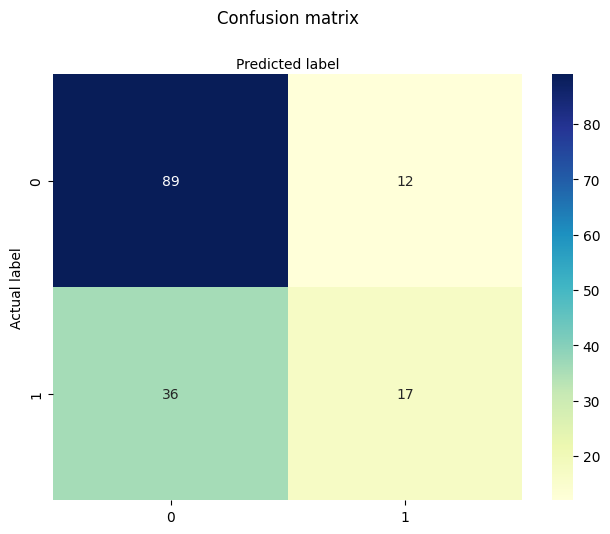

In [ ]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))
print("Precision:",metrics.precision_score(Y_test, Y_prediction))
print("Recall:",metrics.recall_score(Y_test, Y_prediction))
print("F1 Score:",metrics.f1_score(Y_test, Y_prediction))

Accuracy: 0.6883116883116883
Precision: 0.5862068965517241
Recall: 0.32075471698113206
F1 Score: 0.4146341463414634


In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels
#breast_dataset['label'].replace(0, 'Benign',inplace=True)
#breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [ ]:
X_breast_data = breast_dataset.iloc[0:569,0:29].values
Y_breast_data = breast_dataset.iloc[:,30].values
X_breast_standardized = sscale.fit_transform(X_breast_data)
X_breast_train, X_breast_test, Y_breast_train, Y_breast_test = train_test_split(X_breast_standardized, Y_breast_data, train_size = .8, test_size = .2, random_state = 100)

In [ ]:
breast_classifier = LogisticRegression(penalty='l2',random_state = 100,solver='liblinear')
breast_classifier.fit(X_breast_train, Y_breast_train)
Y_breast_prediction = breast_classifier.predict(X_breast_test)
cmatrix_breast = confusion_matrix(Y_breast_test, Y_breast_prediction)

Text(0.5, 427.9555555555555, 'Predicted label')

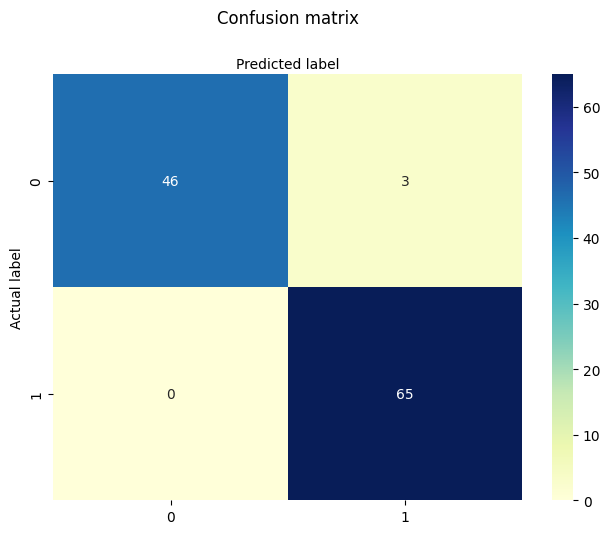

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix_breast), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_breast_test, Y_breast_prediction))
print("Precision:",metrics.precision_score(Y_breast_test, Y_breast_prediction))
print("Recall:",metrics.recall_score(Y_breast_test, Y_breast_prediction))
print("F1 Score:",metrics.f1_score(Y_breast_test, Y_breast_prediction))

Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0
F1 Score: 0.9774436090225563


Text(0.5, 427.9555555555555, 'Predicted label')

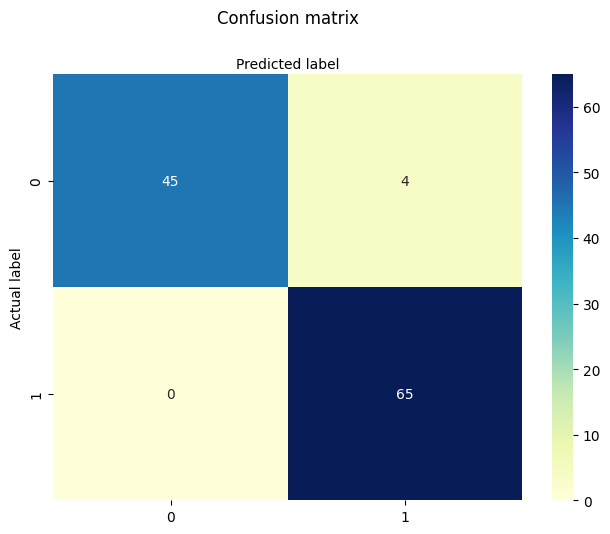

In [ ]:
breast_classifier = LogisticRegression(penalty='l1',random_state = 100, solver='liblinear')
breast_classifier.fit(X_breast_train, Y_breast_train)
Y_breast_prediction = breast_classifier.predict(X_breast_test)
cmatrix_breast_penalty = confusion_matrix(Y_breast_test, Y_breast_prediction)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix_breast_penalty), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_breast_test, Y_breast_prediction))
print("Precision:",metrics.precision_score(Y_breast_test, Y_breast_prediction))
print("Recall:",metrics.recall_score(Y_breast_test, Y_breast_prediction))
print("F1 Score:",metrics.f1_score(Y_breast_test, Y_breast_prediction))

Accuracy: 0.9649122807017544
Precision: 0.9420289855072463
Recall: 1.0
F1 Score: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

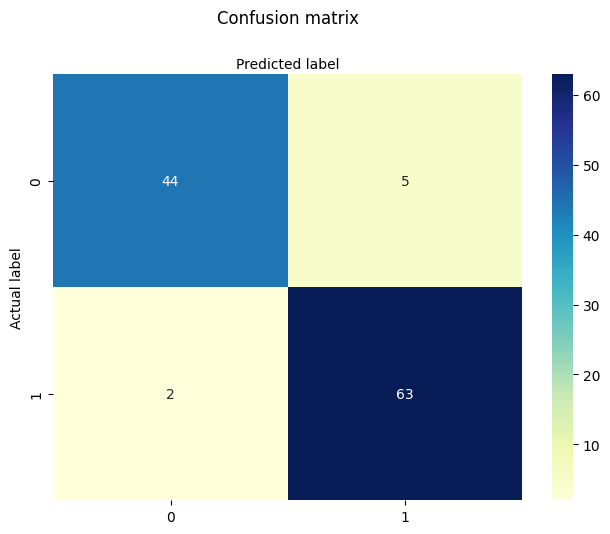

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_breast_train, Y_breast_train)
Y2_breast_pred = gaussian.predict(X_breast_test)
cmatrix_breast_penalty = confusion_matrix(Y_breast_test, Y2_breast_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix_breast_penalty), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_breast_test, Y2_breast_pred))
print("Precision:",metrics.precision_score(Y_breast_test, Y2_breast_pred))
print("Recall:",metrics.recall_score(Y_breast_test, Y2_breast_pred))
print("F1 Score:",metrics.f1_score(Y_breast_test, Y2_breast_pred))

Accuracy: 0.9385964912280702
Precision: 0.9264705882352942
Recall: 0.9692307692307692
F1 Score: 0.9473684210526315


Text(0.5, 427.9555555555555, 'Predicted label')

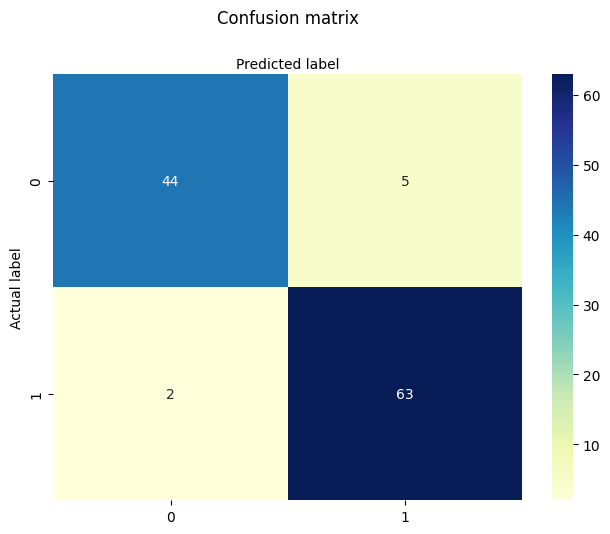

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_breast_train)
breast_classifier = LogisticRegression(random_state = 100)
breast_classifier.fit(principalComponents, Y_breast_train)
Y_breast_prediction = breast_classifier.predict(pca.fit_transform(X_breast_test))
cmatrix_breast_penalty = confusion_matrix(Y_breast_test, Y_breast_prediction)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix_breast_penalty), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_breast_test, Y_breast_prediction))
print("Precision:",metrics.precision_score(Y_breast_test, Y_breast_prediction))
print("Recall:",metrics.recall_score(Y_breast_test, Y_breast_prediction))
print("F1 Score:",metrics.f1_score(Y_breast_test, Y_breast_prediction))

Accuracy: 0.9473684210526315
Precision: 0.9154929577464789
Recall: 1.0
F1 Score: 0.9558823529411765


Text(0.5, 427.9555555555555, 'Predicted label')

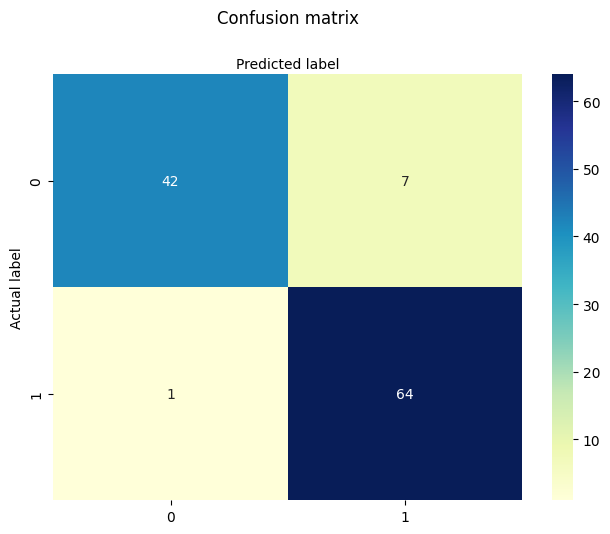

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_breast_train)
gaussian.fit(principalComponents, Y_breast_train)
Y_breast_prediction = gaussian.predict(pca.fit_transform(X_breast_test))
cmatrix_breast_penalty = confusion_matrix(Y_breast_test, Y_breast_prediction)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmatrix_breast_penalty), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_breast_test, Y_breast_prediction))
print("Precision:",metrics.precision_score(Y_breast_test, Y_breast_prediction))
print("Recall:",metrics.recall_score(Y_breast_test, Y_breast_prediction))
print("F1 Score:",metrics.f1_score(Y_breast_test, Y_breast_prediction))

Accuracy: 0.9298245614035088
Precision: 0.9014084507042254
Recall: 0.9846153846153847
F1 Score: 0.9411764705882353
